
# Lab 9 - Logistic Regression    IRIS Dataset

#### Author: Krishna Swaroop
#### 181CO125, NITK Surathkal

# Logistic Regression - Introduction

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist.

In a binary logistic regression model, the dependent variable has two levels (categorical). Outputs with more than two values are modeled by multinomial logistic regression and, if the multiple categories are ordered, by ordinal logistic regression (for example the proportional odds ordinal logistic model). The logistic regression model itself simply models probability of output in terms of input and does not perform statistical classification (it is not a classifier), though it can be used to make a classifier, for instance by choosing a cutoff value and classifying inputs with probability greater than the cutoff as one class, below the cutoff as the other; this is a common way to make a binary classifier.

# Dataset

The iris dataset is a classic and very easy multi-class classification dataset. The dataset is described below



>Features | Quantity
>--- | ---
>Classes | 3
>Samples per Class | 50
>Samples Total | 150
>Dimensionality | 4

The classes are numbered 0/1/2 and the features are real valued attributes

# Logistic Regression

## 1) Install required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.datasets import load_iris


## 2) Load the data

Here, we are loading via scikit-learn's load_iris class. We can alternatively use ```pd.read_csv()``` if we have the csv file of the dataset

---

In [2]:
iris = load_iris()
X, y = load_iris(return_X_y=True)

In [3]:
print("Features of first five values are: ")
print(X[0:5])
print("Classes of first five values are: ", y[0:5])

Features of first five values are: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Classes of first five values are:  [0 0 0 0 0]


## 3) Split data

Use ```train_test_split()``` to split the X and y to training and testing dataset. Here, 20% of the dataset is reserved to test our algorithm


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


## 4) Fit the model

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 5) Accuracy

In [7]:
acc = classifier.score(X_test, y_test)
print("Accuracy of Logistic Regression Model: ", acc)

Accuracy of Logistic Regression Model:  0.9736842105263158


## 6) Metrics and Analysis

In [8]:
y_pred = classifier.predict(X_test)


In [9]:
probs_y=classifier.predict_proba(X_test)


In [10]:
probs_y = np.round(probs_y, 2)


Here is the predicted and real labels of the test samples

In [11]:
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
2          | 2          | 0.0        | 0.03          | 0.97      
1          | 1          | 0.01       | 0.95          | 0.04      
0          | 0          | 1.0        | 0.0           | 0.0       
2          | 2          | 0.0        | 0.08          | 0.92      
0          | 0          | 0.98       | 0.02          | 0.0       
2          | 2          | 0.0        | 0.01          | 0.99      
0          | 0          | 0.98       | 0.02          | 0.0       
1          | 1          | 0.01       | 0.71          | 0.28      
1          | 1          | 0.0        | 0.73          | 0.27      
1          | 1          | 0.02       | 0.89          | 0.08      
2          | 2          | 0.0        | 0.44          | 0.56      
1          | 1          | 0.02       | 0.76          | 0.22      
1          | 1          | 0.01       | 0.85          | 0.13      
1       

In [12]:
cm = confusion_matrix(y_test, y_pred)

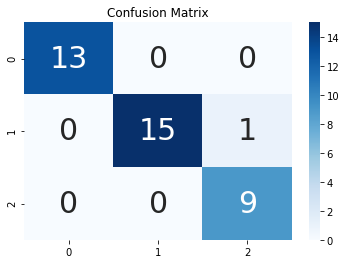

In [13]:
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()